## [Problem 1] Number of wheat on a 2 x 2 square chess board

In [1]:
import numpy as np

In [2]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("Arrange wheat on a plate of 4 squares (list)：{}".format(small_board_list))

Arrange wheat on a plate of 4 squares (list)：[1, 2, 4, 8]


In [3]:
small_board_ndarray = np.array(small_board_list)
print("Arrange wheat on a plate of 4 squares (ndarray)：{}".format(small_board_ndarray))

Arrange wheat on a plate of 4 squares (ndarray)：[1 2 4 8]


In [4]:
## our task 1

In [5]:
chess_board = np.ones ((4, 4))
chess_board

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [6]:
for row in range(0, chess_board.shape[0]):
    prev_row = row
    for col in range(chess_board.shape[1]):
        if row==0 and col==0:
            chess_board[row, col] = 1
        elif col>0 and prev_row==row:
            chess_board[row, col] = 2*chess_board[row, col-1]
        elif row>0 and col==0:
            chess_board[row, col] = 2*chess_board[row-1, -1]

In [7]:
chess_board.astype('int64')

array([[    1,     2,     4,     8],
       [   16,    32,    64,   128],
       [  256,   512,  1024,  2048],
       [ 4096,  8192, 16384, 32768]], dtype=int64)

## [Problem 2] Expansion to n×m squares

In [9]:
def wheat_chessboard(matrix_height, matrix_width):

    """
    The function that computes wheat numbers for a given matrix 

    Parameters:
    a given size of matrix

    Return:
    the number of wheat
    
    """
    chess_board = np.zeros((matrix_height, matrix_width))

    for row in range(0, chess_board.shape[0]):
        prev_row = row
        for col in range(chess_board.shape[1]):
            if row==0 and col==0:
                chess_board[row, col] = 1
            elif col>0 and prev_row==row:
                chess_board[row, col] = 2*chess_board[row, col-1]
            elif row>0 and col==0:
                chess_board[row, col] = 2*chess_board[row-1, -1]

    return chess_board

In [10]:
### n x m 
n = 8
m = 8
wheat_chessboard(matrix_height=n, matrix_width=m).astype('int')

C:\Users\bilguun.ERDENETMC\AppData\Local\Temp\ipykernel_21016\846351900.py:4: RuntimeWarning: invalid value encountered in cast
  wheat_chessboard(matrix_height=n, matrix_width=m).astype('int')


array([[          1,           2,           4,           8,          16,
                 32,          64,         128],
       [        256,         512,        1024,        2048,        4096,
               8192,       16384,       32768],
       [      65536,      131072,      262144,      524288,     1048576,
            2097152,     4194304,     8388608],
       [   16777216,    33554432,    67108864,   134217728,   268435456,
          536870912,  1073741824, -2147483648],
       [-2147483648, -2147483648, -2147483648, -2147483648, -2147483648,
        -2147483648, -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, -2147483648, -2147483648,
        -2147483648, -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, -2147483648, -2147483648,
        -2147483648, -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, -2147483648, -2147483648,
        -2147483648, -2147483648, -2147483648]])

## [Problem 3] Total number of wheat

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
n = 8
m = 8
chess_board = wheat_chessboard(matrix_height=n, matrix_width=m)

In [13]:
avg_cols = chess_board.mean(axis=0)
avg_cols

array([9.04252160e+15, 1.80850432e+16, 3.61700864e+16, 7.23401728e+16,
       1.44680346e+17, 2.89360691e+17, 5.78721383e+17, 1.15744277e+18])

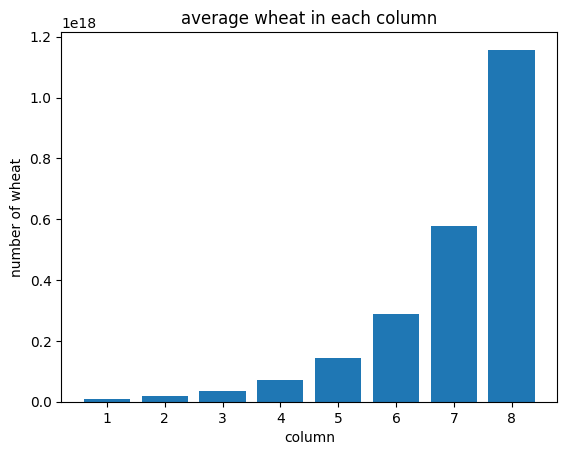

In [14]:
plt.xlabel("column")
plt.ylabel("number of wheat")
plt.title("average wheat in each column")
plt.bar(np.arange(1, 9), avg_cols)
plt.show()

## [Problem 4] Heat map of the number of wheat crops

In [15]:
n = 2
m = 4
chess_board = wheat_chessboard(matrix_height=n, matrix_width=m)

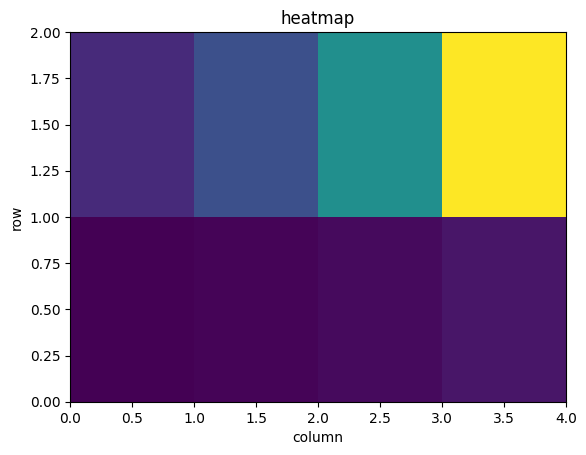

In [16]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor((chess_board))
plt.show()

## [Problem 5] How many times larger is the second half than the first half?

In [17]:
n = 8
m = 8
chess_board = wheat_chessboard(matrix_height=n, matrix_width=m)

first_half = np.sum(chess_board[:4, :])
second_half = np.sum(chess_board[4:, :])

times = second_half / first_half
print(f"The second half is {times} times larger than the first half")

The second half is 4294967296.0 times larger than the first half


In [18]:
# Other calculation methods

In [19]:
n_squares = 4
small_board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


In [20]:
n_squares = 4
indices_of_squares = np.arange(n_squares)
small_board_ndarray = 2**indices_of_squares
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


In [21]:
# numpy broadcasting 
a = np.array([0,1,2])

#ブロードキャストを使わない場合
b = np.array([5,5,5])
print(a + b)  # Out: [5,6,7]

#ブロードキャストを使う場合
print(a + 5)  # Out: [5,6,7]　※5が自動的に(1,3)の行列([5,5,5])に変換されている

[5 6 7]
[5 6 7]


In [22]:
n_squares = 64
board_ndarray = np.array([1]).astype("int32")
for _ in range(n_squares - 1):
    board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
print("最後のマスの小麦の数：{}".format(board_ndarray[-1]))

最後のマスの小麦の数：0


C:\Users\bilguun.ERDENETMC\AppData\Local\Temp\ipykernel_21016\528873720.py:4: RuntimeWarning: overflow encountered in scalar multiply
  board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])


In [23]:
board_ndarray

array([          1,           2,           4,           8,          16,
                32,          64,         128,         256,         512,
              1024,        2048,        4096,        8192,       16384,
             32768,       65536,      131072,      262144,      524288,
           1048576,     2097152,     4194304,     8388608,    16777216,
          33554432,    67108864,   134217728,   268435456,   536870912,
        1073741824, -2147483648,           0,           0,           0,
                 0,           0,           0,           0,           0,
                 0,           0,           0,           0,           0,
                 0,           0,           0,           0,           0,
                 0,           0,           0,           0,           0,
                 0,           0,           0,           0,           0,
                 0,           0,           0,           0])

In [24]:
n_squares = 64
indices_of_squares = np.arange(n_squares)
board_ndarray = 2**indices_of_squares
print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # -9223372036854775808

最後のマスの小麦の数：0


In [25]:
print(board_ndarray.dtype)

int32


## [Problem 6] Extending to n×m grids using other calculation methods

In [26]:
def wheat_chessboard_numpy(matrix_height, matrix_width):

    ### TODO comment
    
    indices_of_squares = np.arange(matrix_height*matrix_width).astype("int64")
    chess_board = 2**indices_of_squares
    chess_board = chess_board.reshape((matrix_height, matrix_width))

    return chess_board

In [27]:
n = 8
m = 8
chess_board = wheat_chessboard_numpy(matrix_height=n, matrix_width=m)
chess_board

array([[                   1,                    2,                    4,
                           8,                   16,                   32,
                          64,                  128],
       [                 256,                  512,                 1024,
                        2048,                 4096,                 8192,
                       16384,                32768],
       [               65536,               131072,               262144,
                      524288,              1048576,              2097152,
                     4194304,              8388608],
       [            16777216,             33554432,             67108864,
                   134217728,            268435456,            536870912,
                  1073741824,           2147483648],
       [          4294967296,           8589934592,          17179869184,
                 34359738368,          68719476736,         137438953472,
                274877906944,         5497558138

## [Problem 7] Comparison of calculation times

In [28]:
%%timeit
n = 8
m = 8
chess_board = wheat_chessboard(matrix_height=n, matrix_width=m)
chess_board

37.8 µs ± 1.2 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [29]:
%%timeit
n = 8
m = 8
chess_board = wheat_chessboard_numpy(matrix_height=n, matrix_width=m)
chess_board

7.07 µs ± 224 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
